# MS Data

## Spectrum

The most important container for raw data and peaks is
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
which we have already worked with in the [Getting
Started](first_steps.ipynb#iteration) tutorial.
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
is a container for 1-dimensional peak data (a container of
[Peak1D](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Peak1D.html)).
You can access these objects directly, by using an iterator or indexing.
Meta-data is accessible through inheritance of the
[SpectrumSettings](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.SpectrumSettings.html)
objects which handles meta data of a mass spectrum.

In the following example program, a
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
is filled with peaks, sorted according to mass-to-charge ratio and a
selection of peak positions is displayed.

First we create a mass spectrum and insert peaks with descending
mass-to-charge ratios:

In [ ]:
import pyopenms as oms

spectrum = oms.MSSpectrum()
mz = range(500, 1500, 100)
i = [1 for mass in mz]
spectrum.set_peaks([mz, i])

# Sort the peaks according to ascending mass-to-charge ratio
spectrum.sortByPosition()

# Iterate over spectrum of those peaks
for p in spectrum:
    print(p.getMZ(), p.getIntensity())

# Access a peak by index
print("\nFirst peak: ", spectrum[0].getMZ(), spectrum[0].getIntensity())

``` output
500.0 1.0
600.0 1.0
700.0 1.0
800.0 1.0
900.0 1.0
1000.0 1.0
1100.0 1.0
1200.0 1.0
1300.0 1.0
1400.0 1.0

First peak: 500.0 1.0
```

Note how lines 11-12 (as well as line 19) use the direct access to the
[Peak1D](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Peak1D.html)
objects (explicit iteration through the
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
object, which is convenient but slow since a new
[Peak1D](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Peak1D.html)
object needs to be created each time). The following example uses the
faster access through numpy arrays with
[MSSpectrum.get_peaks](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.get_peaks.html)
or
[MSSpectrum.set_peaks](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.set_peaks.html).
Direct iteration is only shown for demonstration purposes and should not
be used in production code.

In [ ]:
# More efficient peak access with get_peaks()
for mz, i in zip(*spectrum.get_peaks()):
    print(mz, i)

``` output
500.0 1.0
600.0 1.0
700.0 1.0
800.0 1.0
900.0 1.0
1000.0 1.0
1100.0 1.0
1200.0 1.0
1300.0 1.0
1400.0 1.0
```

To discover the full set of functionality of
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html),
we use the Python
[help](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.help.html)
function. In particular, we find several important sets of meta
information attached to the mass spectrum including retention time, the
MS level
([MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1),
[MS2](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS2),
...), precursor ion, ion mobility drift time and extra data arrays.

In [ ]:
help(oms.MSSpectrum)

We now set several of these properties in a current
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html):

In [ ]:
# create spectrum and set properties
spectrum = oms.MSSpectrum()
spectrum.setDriftTime(25)  # 25 ms
spectrum.setRT(205.2)  # 205.2 s
spectrum.setMSLevel(3)  # MS3

# Add peak(s) to spectrum
spectrum.set_peaks(([401.5], [900]))

# create precursor information
p = oms.Precursor()
p.setMZ(600)  # isolation at 600 +/- 1.5 Th
p.setIsolationWindowLowerOffset(1.5)
p.setIsolationWindowUpperOffset(1.5)
p.setActivationEnergy(40)  # 40 eV
p.setCharge(4)  # 4+ ion

# and store precursor in spectrum
spectrum.setPrecursors([p])

# set additional instrument settings (e.g. scan polarity)
IS = oms.InstrumentSettings()
IS.setPolarity(oms.IonSource.Polarity.POSITIVE)
spectrum.setInstrumentSettings(IS)

# get and check scan polarity
polarity = spectrum.getInstrumentSettings().getPolarity()
if polarity == oms.IonSource.Polarity.POSITIVE:
    print("scan polarity: positive")
elif polarity == oms.IonSource.Polarity.NEGATIVE:
    print("scan polarity: negative")

# Optional: additional data arrays / peak annotations
fda = oms.FloatDataArray()
fda.setName("Signal to Noise Array")
fda.push_back(15)
sda = oms.StringDataArray()
sda.setName("Peak annotation")
sda.push_back("y15++")
spectrum.setFloatDataArrays([fda])
spectrum.setStringDataArrays([sda])

# Add spectrum to MSExperiment
exp = oms.MSExperiment()
exp.addSpectrum(spectrum)

# Add second spectrum to the MSExperiment
spectrum2 = oms.MSSpectrum()
spectrum2.set_peaks(([1, 2], [1, 2]))
exp.addSpectrum(spectrum2)

# store spectra in mzML file
oms.MzMLFile().store("testfile.mzML", exp)

``` output
scan polarity: positive
```

We have created a single mass spectrum and set basic mass spectrum
properties (drift time, retention time, MS level, precursor charge,
isolation window and activation energy). Additional instrument settings
allow to set e.g. the polarity of the Ion source). We next add actual
peaks into the spectrum (a single peak at
Lmath:<span class="title-ref">401.5</span> m/z and $900\ intensity$).
Additional metadata can be stored in data arrays for each peak (e.g. use
cases care peak annotations or "Signal to Noise" values for each peak.
Finally, we add the spectrum to an
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
container to save it using the
[MzMLFile](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MzMLFile.html)
class in a file called `testfile.mzML`.

You can now open the resulting mass spectrum in a mass spectrum viewer.
We use the OpenMS viewer
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
(which you will get when you install OpenMS from the official website)
and look at our mass spectrum:

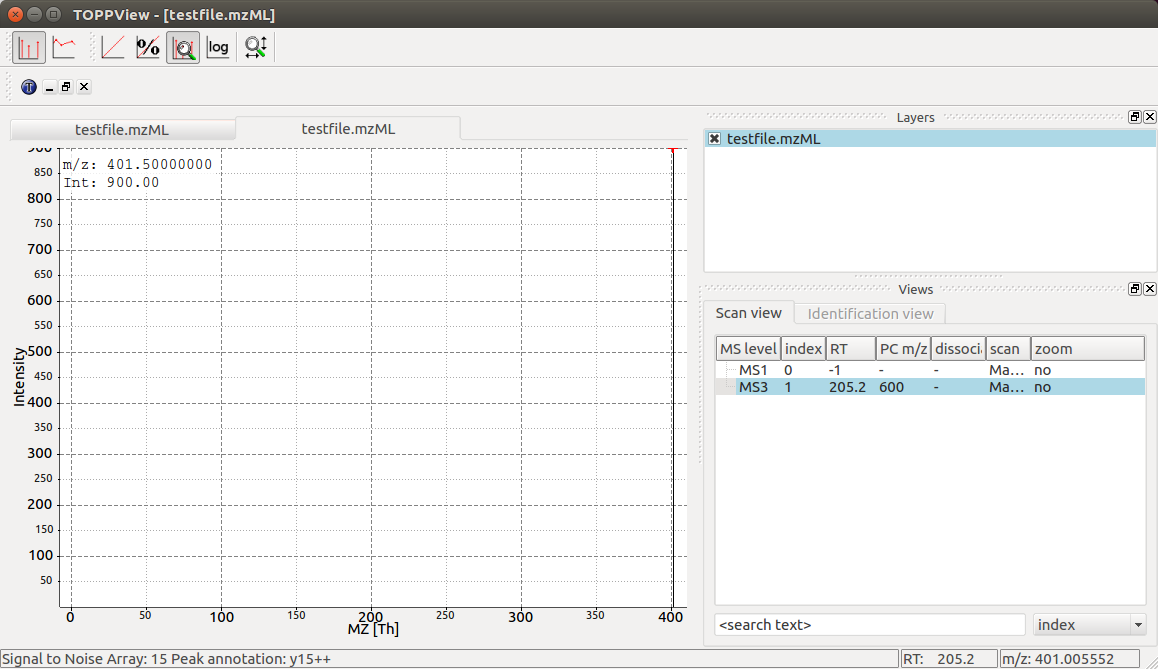

[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
displays our mass spectrum with its single peak at $401.5\ m/z$ and it
also correctly displays its retention time at $205.2\ seconds$ and
precursor isolation target of $600.0/ m/z$. Notice how
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
displays the information about the S/N for the peak (S/N = 15) and its
annotation as `y15++` in the status bar below when the user clicks on
the peak at $401.5\ m/z$ as shown in the screenshot.

We can also visualize our mass spectrum from before using the
[plot_spectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.plot_spectrum.html)
function from the
[spectrum_utils](https://github.com/bittremieux/spectrum_utils)
visualization library:

In [ ]:
import matplotlib.pyplot as plt
from pyopenms.plotting import plot_spectrum
import matplotlib.pyplot as plt

plot_spectrum(spectrum)
plt.show()

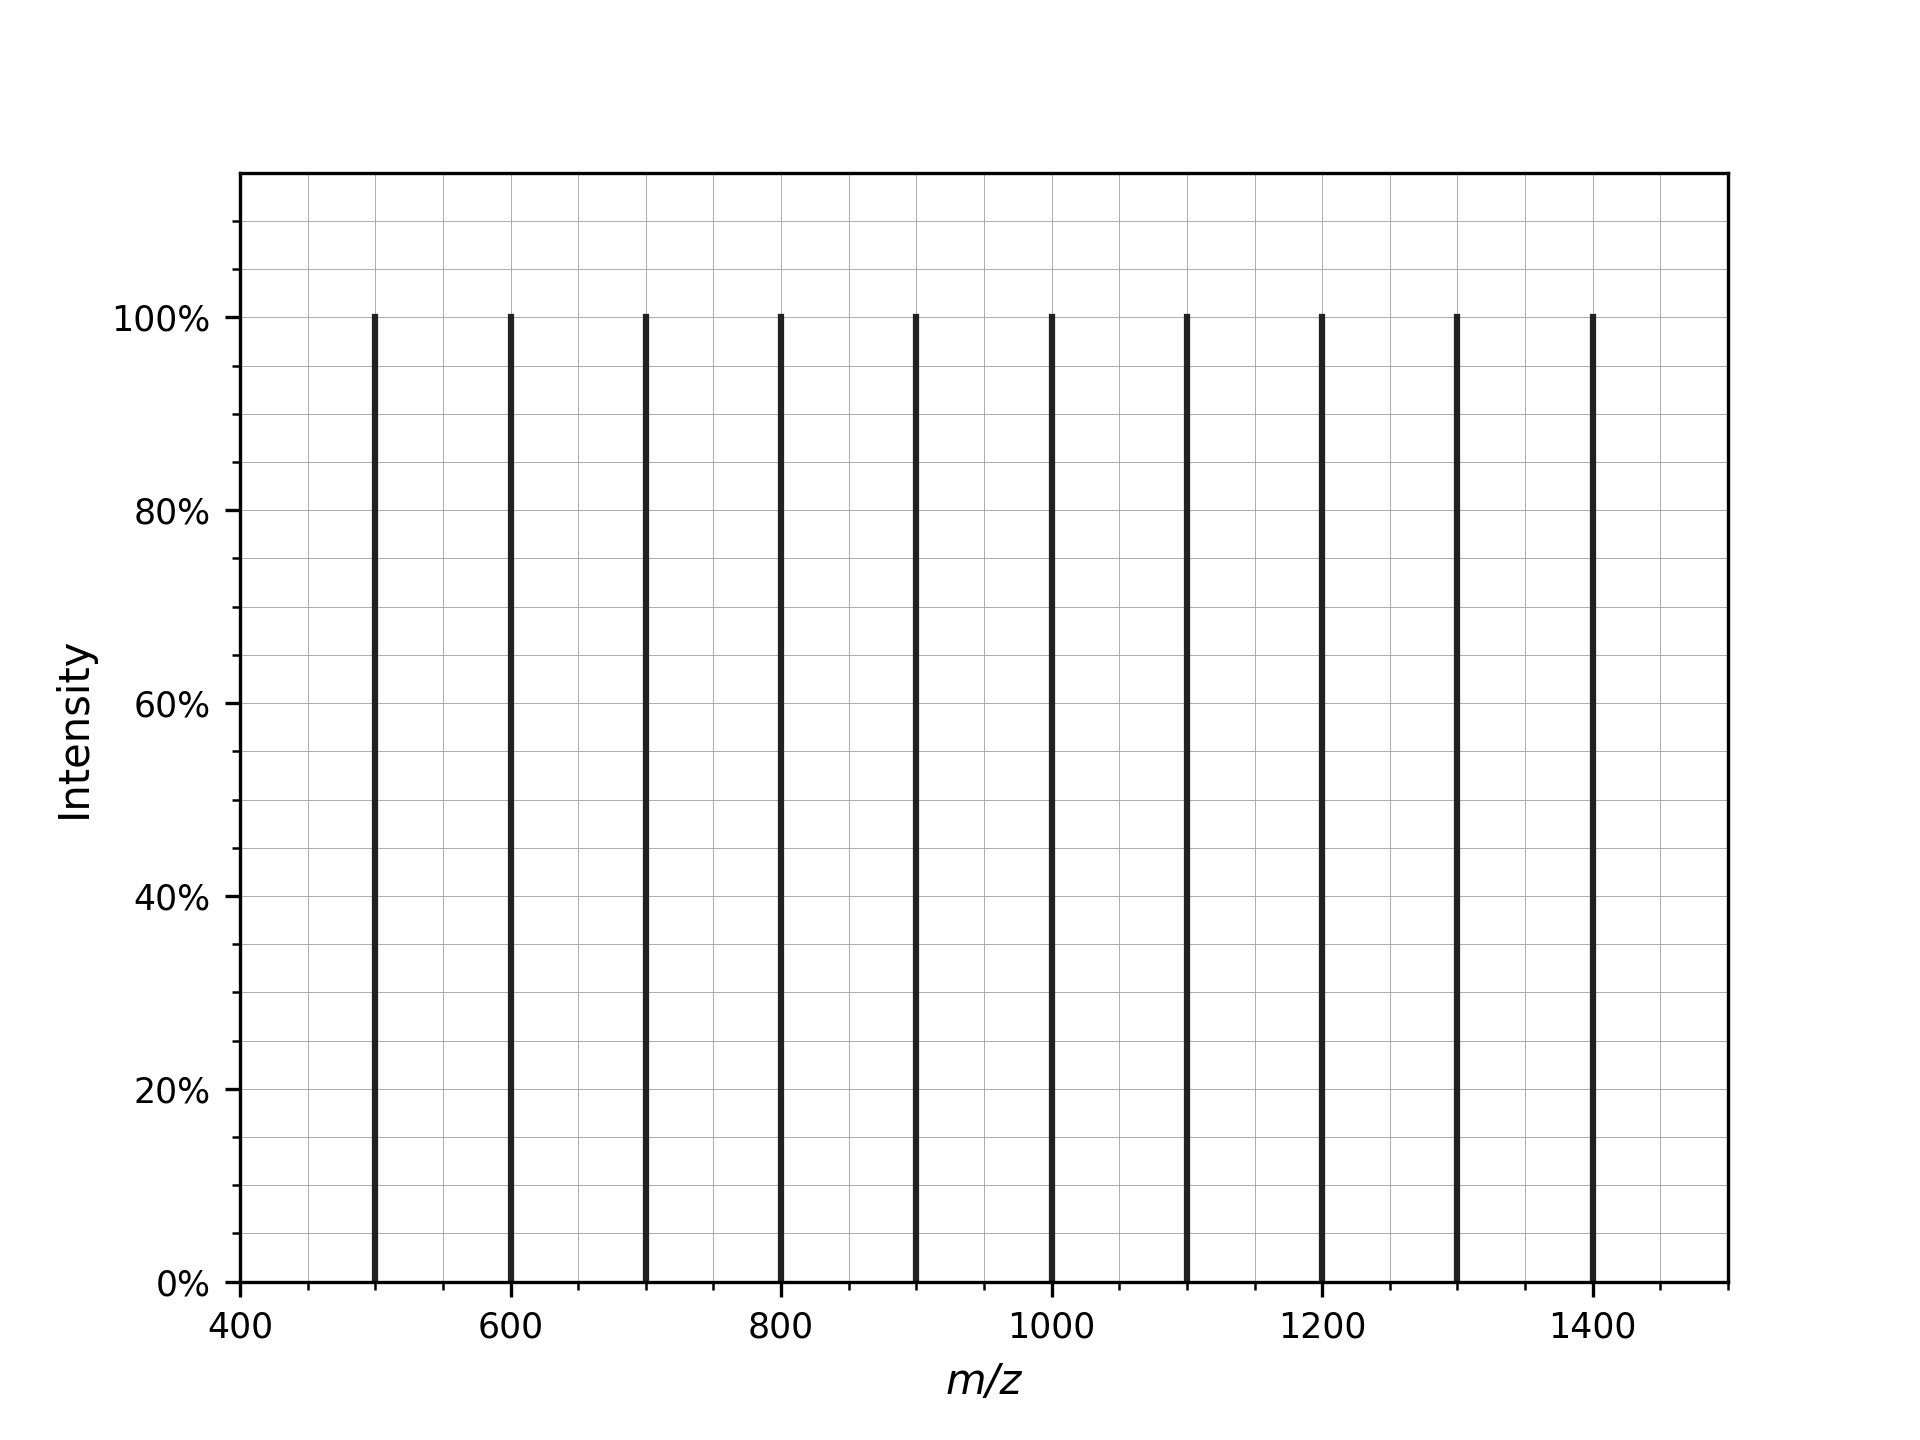

## Chromatogram

An additional container for raw data is the
[MSChromatogram](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSChromatogram.html)
container, which is highly analogous to the
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
container, but contains an array of
[ChromatogramPeak](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ChromatogramPeak.html)
and is derived from
[ChromatogramSettings](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ChromatogramSettings.html):

In [ ]:
import numpy as np


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.0) / (2 * np.power(sig, 2.0)))


# Create new chromatogram
chromatogram = oms.MSChromatogram()

# Set raw data (RT and intensity)
rt = range(1500, 500, -100)
i = [gaussian(rtime, 1000, 150) for rtime in rt]
chromatogram.set_peaks([rt, i])

# Sort the peaks according to ascending retention time
chromatogram.sortByPosition()

print("Iterate over peaks with getRT() and getIntensity()")
for p in chromatogram:
    print(p.getRT(), p.getIntensity())

print("\nIterate more efficiently over peaks with get_peaks()")
for rt, i in zip(*chromatogram.get_peaks()):
    print(rt, i)

print("\nAccess an individual peak by index")
print(chromatogram[2].getRT(), chromatogram[2].getIntensity())

# Add meta information to the chromatogram
chromatogram.setNativeID("Trace XIC@405.2")

# Store a precursor ion for the chromatogram
p = oms.Precursor()
p.setIsolationWindowLowerOffset(1.5)
p.setIsolationWindowUpperOffset(1.5)
p.setMZ(405.2)  # isolation at 405.2 +/- 1.5 Th
p.setActivationEnergy(40)  # 40 eV
p.setCharge(2)  # 2+ ion
p.setMetaValue("description", chromatogram.getNativeID())
p.setMetaValue("peptide_sequence", chromatogram.getNativeID())
chromatogram.setPrecursor(p)

# Also store a product ion for the chromatogram (e.g. for SRM)
p = oms.Product()
p.setMZ(603.4)  # transition from 405.2 -> 603.4
chromatogram.setProduct(p)

# Store as mzML
exp = oms.MSExperiment()
exp.addChromatogram(chromatogram)
oms.MzMLFile().store("testfile3.mzML", exp)

# Visualize the resulting data using matplotlib
import matplotlib.pyplot as plt

for chrom in exp.getChromatograms():
    retention_times, intensities = chrom.get_peaks()
    plt.plot(retention_times, intensities, label=chrom.getNativeID())

plt.xlabel("time (s)")
plt.ylabel("intensity (cps)")
plt.legend()
plt.show()

``` output
Iterate over peaks with getRT() and getIntensity()
600.0 0.028565499931573868
700.0 0.1353352814912796
800.0 0.4111122786998749
900.0 0.8007373809814453
1000.0 1.0
1100.0 0.8007373809814453
1200.0 0.4111122786998749
1300.0 0.1353352814912796
1400.0 0.028565499931573868
1500.0 0.003865920240059495

Iterate more efficiently over peaks with get_peaks()
600.0 0.0285655
700.0 0.13533528
800.0 0.41111228
900.0 0.8007374
1000.0 1.0
1100.0 0.8007374
1200.0 0.41111228
1300.0 0.13533528
1400.0 0.0285655
1500.0 0.0038659202

Access an individual peak by index
800.0 0.4111122786998749
```

This shows how the
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
class can hold mass spectra as well as chromatograms .

Again we can visualize the resulting data using
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
using its chromatographic viewer capability, which shows the peak over
retention time:

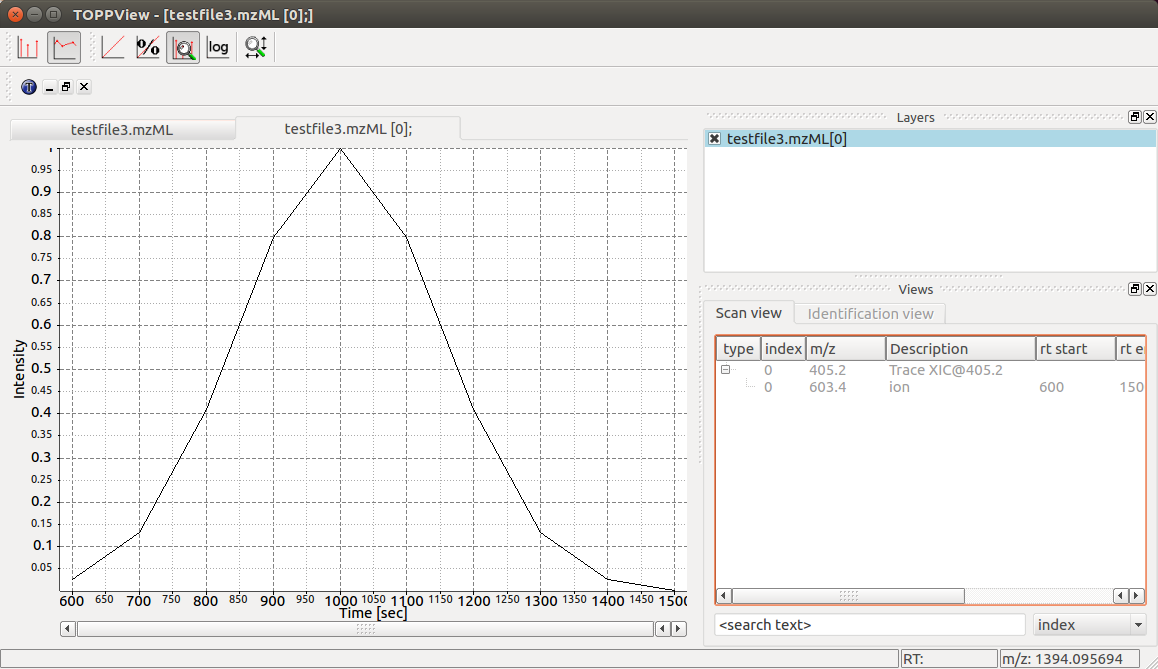

Note how the annotation using precursor and production mass of our XIC
chromatogram is displayed in the viewer.

We can also visualize the resulting data using `matplotlib`. Here we can
plot every chromatogram in our
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
and label it with it's native ID.

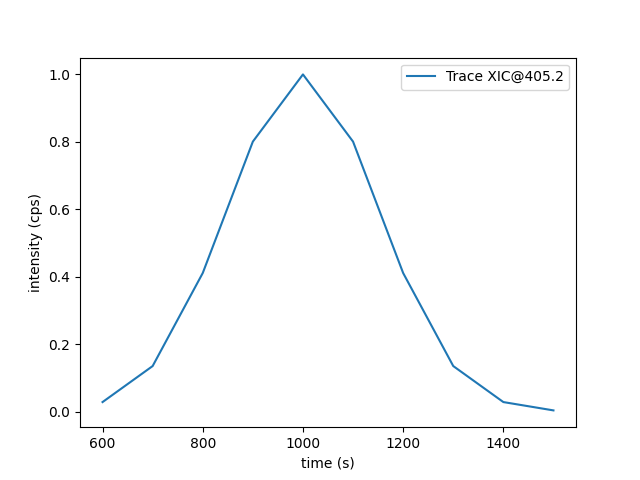

## [LC-MS/MS](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-LC-MS/MS) Experiment

In OpenMS,
[LC-MS/MS](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-LC-MS/MS)
injections are represented as so-called peak maps (using the
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
class), which we have already encountered above. The
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
class can hold a list of
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
object (as well as a list of
[MSChromatogram](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSChromatogram.html)
objects, see below). The
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
object holds such peak maps as well as meta-data about the injection.
Access to individual mass spectra is performed through
[MSExperiment.getSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getSpectrum.html)
and
[MSExperiment.getChromatogram](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getChromatogram.html).

In the following code, we create an
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
and populate it with several mass spectra:

In [ ]:
# The following examples creates an MSExperiment which holds six
# MSSpectrum instances.
exp = oms.MSExperiment()
for i in range(6):
    spectrum = oms.MSSpectrum()
    spectrum.setRT(i)
    spectrum.setMSLevel(1)
    for mz in range(500, 900, 100):
        peak = oms.Peak1D()
        peak.setMZ(mz + i)
        peak.setIntensity(100 - 25 * abs(i - 2.5))
        spectrum.push_back(peak)
    exp.addSpectrum(spectrum)

# Iterate over spectra
for i_spectrum, spectrum in enumerate(exp, start=1):
    print("Spectrum {i:d}:".format(i=i_spectrum))
    for peak in spectrum:
        print(spectrum.getRT(), peak.getMZ(), peak.getIntensity())

``` output
Spectrum 1:
0.0 500.0 37.5
0.0 600.0 37.5
0.0 700.0 37.5
0.0 800.0 37.5
Spectrum 2:
1.0 501.0 62.5
1.0 601.0 62.5
1.0 701.0 62.5
1.0 801.0 62.5
Spectrum 3:
2.0 502.0 87.5
2.0 602.0 87.5
2.0 702.0 87.5
2.0 802.0 87.5
Spectrum 4:
3.0 503.0 87.5
3.0 603.0 87.5
3.0 703.0 87.5
3.0 803.0 87.5
Spectrum 5:
4.0 504.0 62.5
4.0 604.0 62.5
4.0 704.0 62.5
4.0 804.0 62.5
Spectrum 6:
5.0 505.0 37.5
5.0 605.0 37.5
5.0 705.0 37.5
5.0 805.0 37.5
```

In the above code, we create six instances of
[MSSpectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.html)
(line 4), populate it with three peaks at $500$, $900$ and $100$ m/z and
append them to the
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
object (line 13). We can easily iterate over the mass spectra in the
whole experiment by using the intuitive iteration on lines 16-19 or we
can use list comprehensions to sum up intensities of all mass spectra
that fulfill certain conditions:

In [ ]:
# Sum intensity of all spectra between RT 2.0 and 3.0
print(
    sum(
        [
            p.getIntensity()
            for s in exp
            if s.getRT() >= 2.0 and s.getRT() <= 3.0
            for p in s
        ]
    )
)

``` output
700.0
```

We could store the resulting experiment containing the six mass spectra
as mzML using the
[MzMLFile](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MzMLFile.html)
object:

In [ ]:
# Store as mzML
oms.MzMLFile().store("testfile2.mzML", exp)

Again we can visualize the resulting data using
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
using its 3D viewer capability, which shows the six scans over retention
time where the traces first increase and then decrease in intensity:

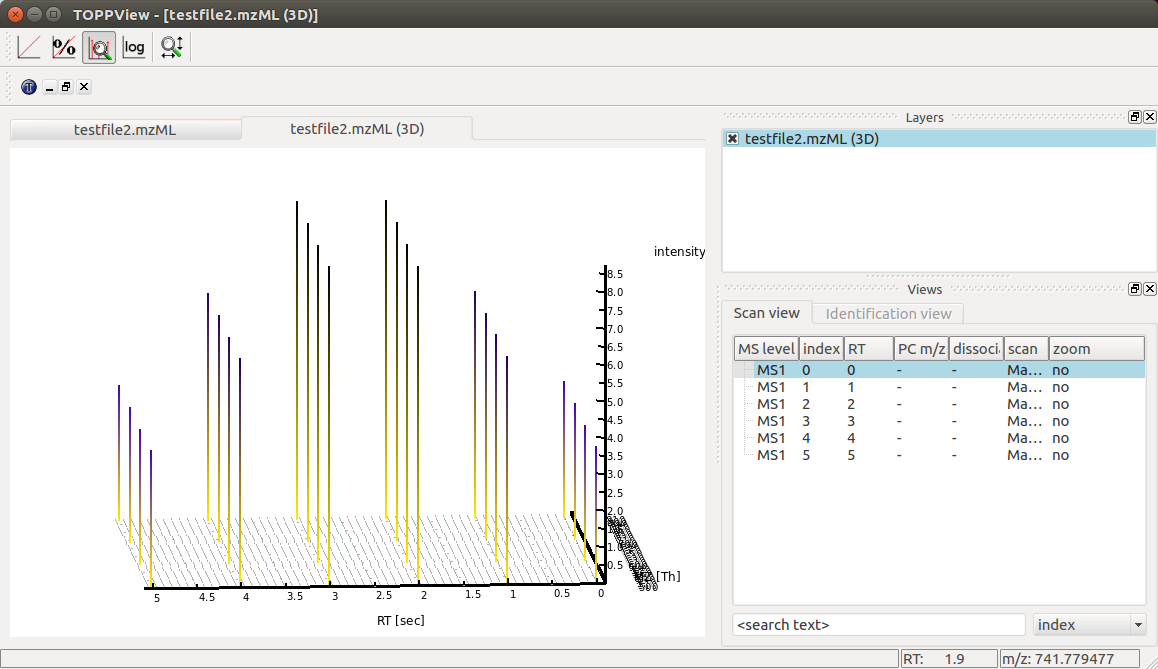

Alternatively we can visualize our data directly with Python. For
smaller data sets we can use `matplotlib` to generate a 2D scatter plot
with the peak intensities represented by a colorbar. With this plot we
can zoom in and inspect our data in more detail.

The following example figures were generated using a [mzML
file](https://github.com/OpenMS/OpenMS/blob/develop/src/tests/topp/FeatureFinderMetaboIdent_1_input.mzML)
provided by OpenMS.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


def plot_spectra_2D(exp, ms_level=1, marker_size=5):
    exp.updateRanges()
    for spec in exp:
        if spec.getMSLevel() == ms_level:
            mz, intensity = spec.get_peaks()
            p = intensity.argsort()  # sort by intensity to plot highest on top
            rt = np.full([mz.shape[0]], spec.getRT(), float)
            plt.scatter(
                rt,
                mz[p],
                c=intensity[p],
                cmap="afmhot_r",
                s=marker_size,
                norm=colors.LogNorm(
                    exp.getMinIntensity() + 1, exp.getMaxIntensity()
                ),
            )
    plt.clim(exp.getMinIntensity() + 1, exp.getMaxIntensity())
    plt.xlabel("time (s)")
    plt.ylabel("m/z")
    plt.colorbar()
    plt.show()  # slow for larger data sets


from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML", "test.mzML")

exp = oms.MSExperiment()
oms.MzMLFile().load("test.mzML", exp)

plot_spectra_2D(exp)

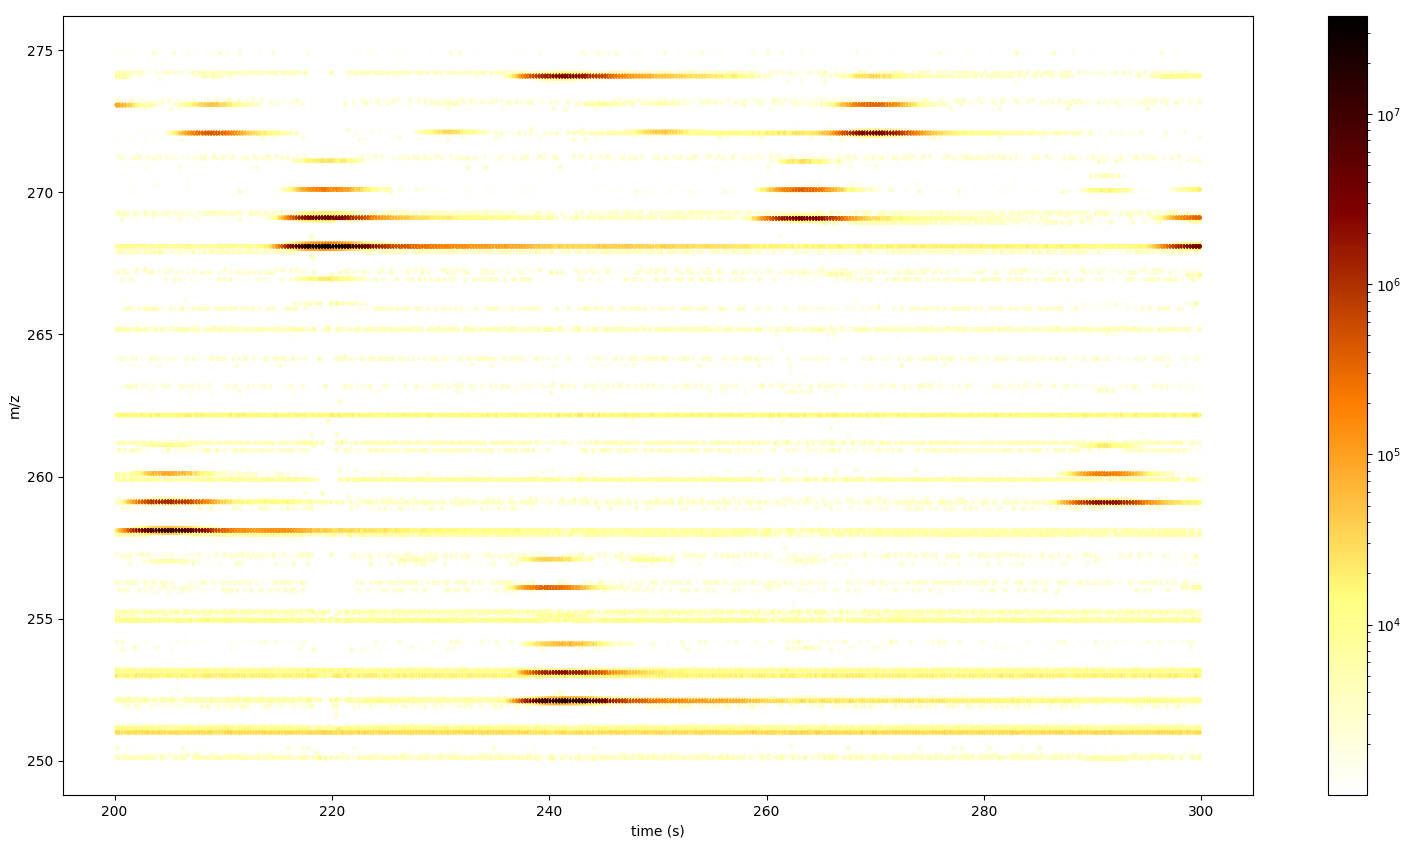

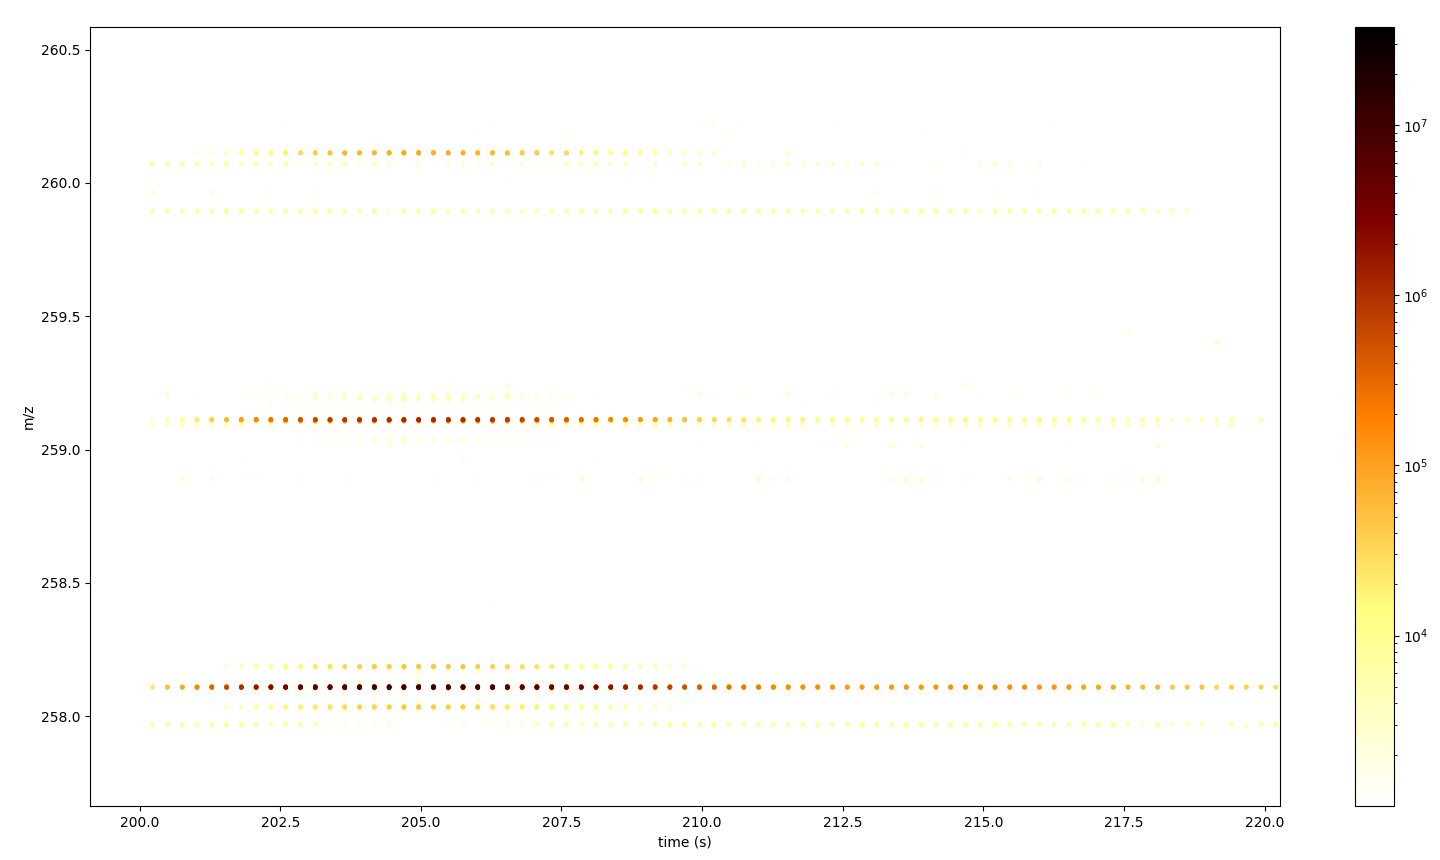

For larger data sets this will be too slow since every individual peak
gets displayed. However, we can use
[BilinearInterpolation](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.BilinearInterpolation.html)
which produces an overview image of our mass spectra. This can be useful
for a brief visual inspection of your sample in quality control.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_spectra_2D_overview(experiment):
    rows = 200.0
    cols = 200.0
    exp.updateRanges()

    bilip = oms.BilinearInterpolation()
    tmp = bilip.getData()
    tmp.resize(int(rows), int(cols), float())
    bilip.setData(tmp)
    bilip.setMapping_0(0.0, exp.getMinRT(), rows - 1, exp.getMaxRT())
    bilip.setMapping_1(0.0, exp.getMinMZ(), cols - 1, exp.getMaxMZ())
    for spec in exp:
        if spec.getMSLevel() == 1:
            mzs, ints = spec.get_peaks()
            rt = spec.getRT()
            for i in range(0, len(mzs)):
                bilip.addValue(rt, mzs[i], ints[i])

    data = np.ndarray(shape=(int(cols), int(rows)), dtype=np.float64)
    for i in range(int(rows)):
        for j in range(int(cols)):
            data[i][j] = bilip.getData().getValue(i, j)

    plt.imshow(np.rot90(data), cmap="gist_heat_r")
    plt.xlabel("retention time (s)")
    plt.ylabel("m/z")
    plt.xticks(
        np.linspace(0, int(rows), 20, dtype=int),
        np.linspace(exp.getMinRT(), exp.getMaxRT(), 20, dtype=int),
    )
    plt.yticks(
        np.linspace(0, int(cols), 20, dtype=int),
        np.linspace(exp.getMinMZ(), exp.getMaxMZ(), 20, dtype=int)[::-1],
    )
    plt.show()


plot_spectra_2D_overview(exp)

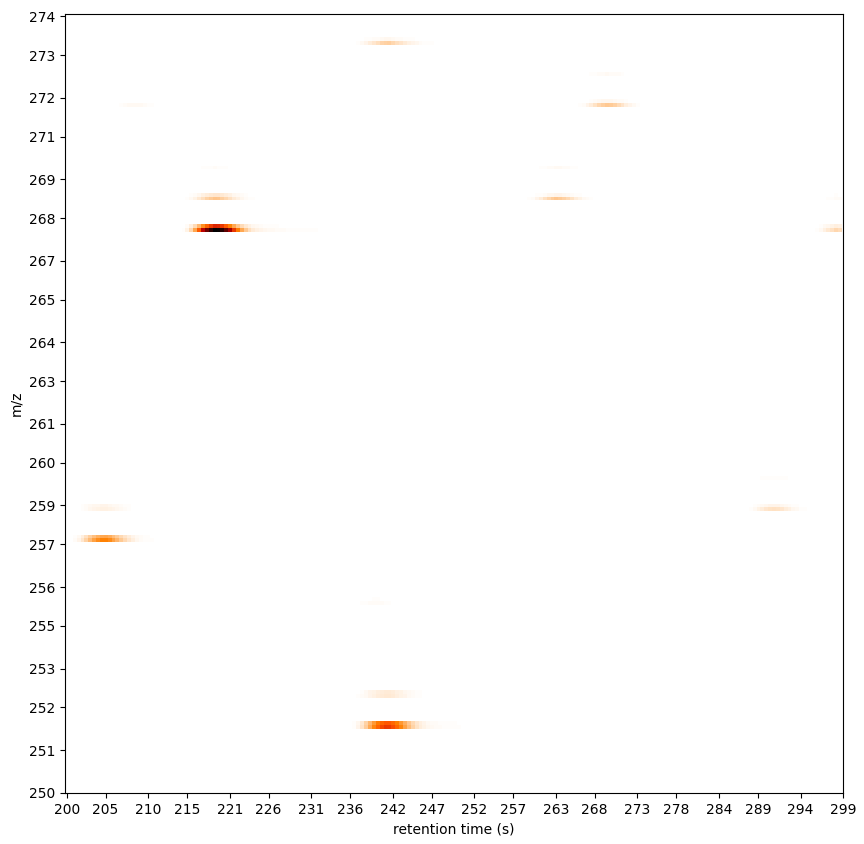

## Example: Precursor Purity

When an
[MS2](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS2)
spectrum is generated, the precursor from the
[MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1)
spectrum is gathered, fragmented and measured. In practice, the
instrument gathers the ions in a user-defined window around the
precursor m/z - the so-called precursor isolation window.

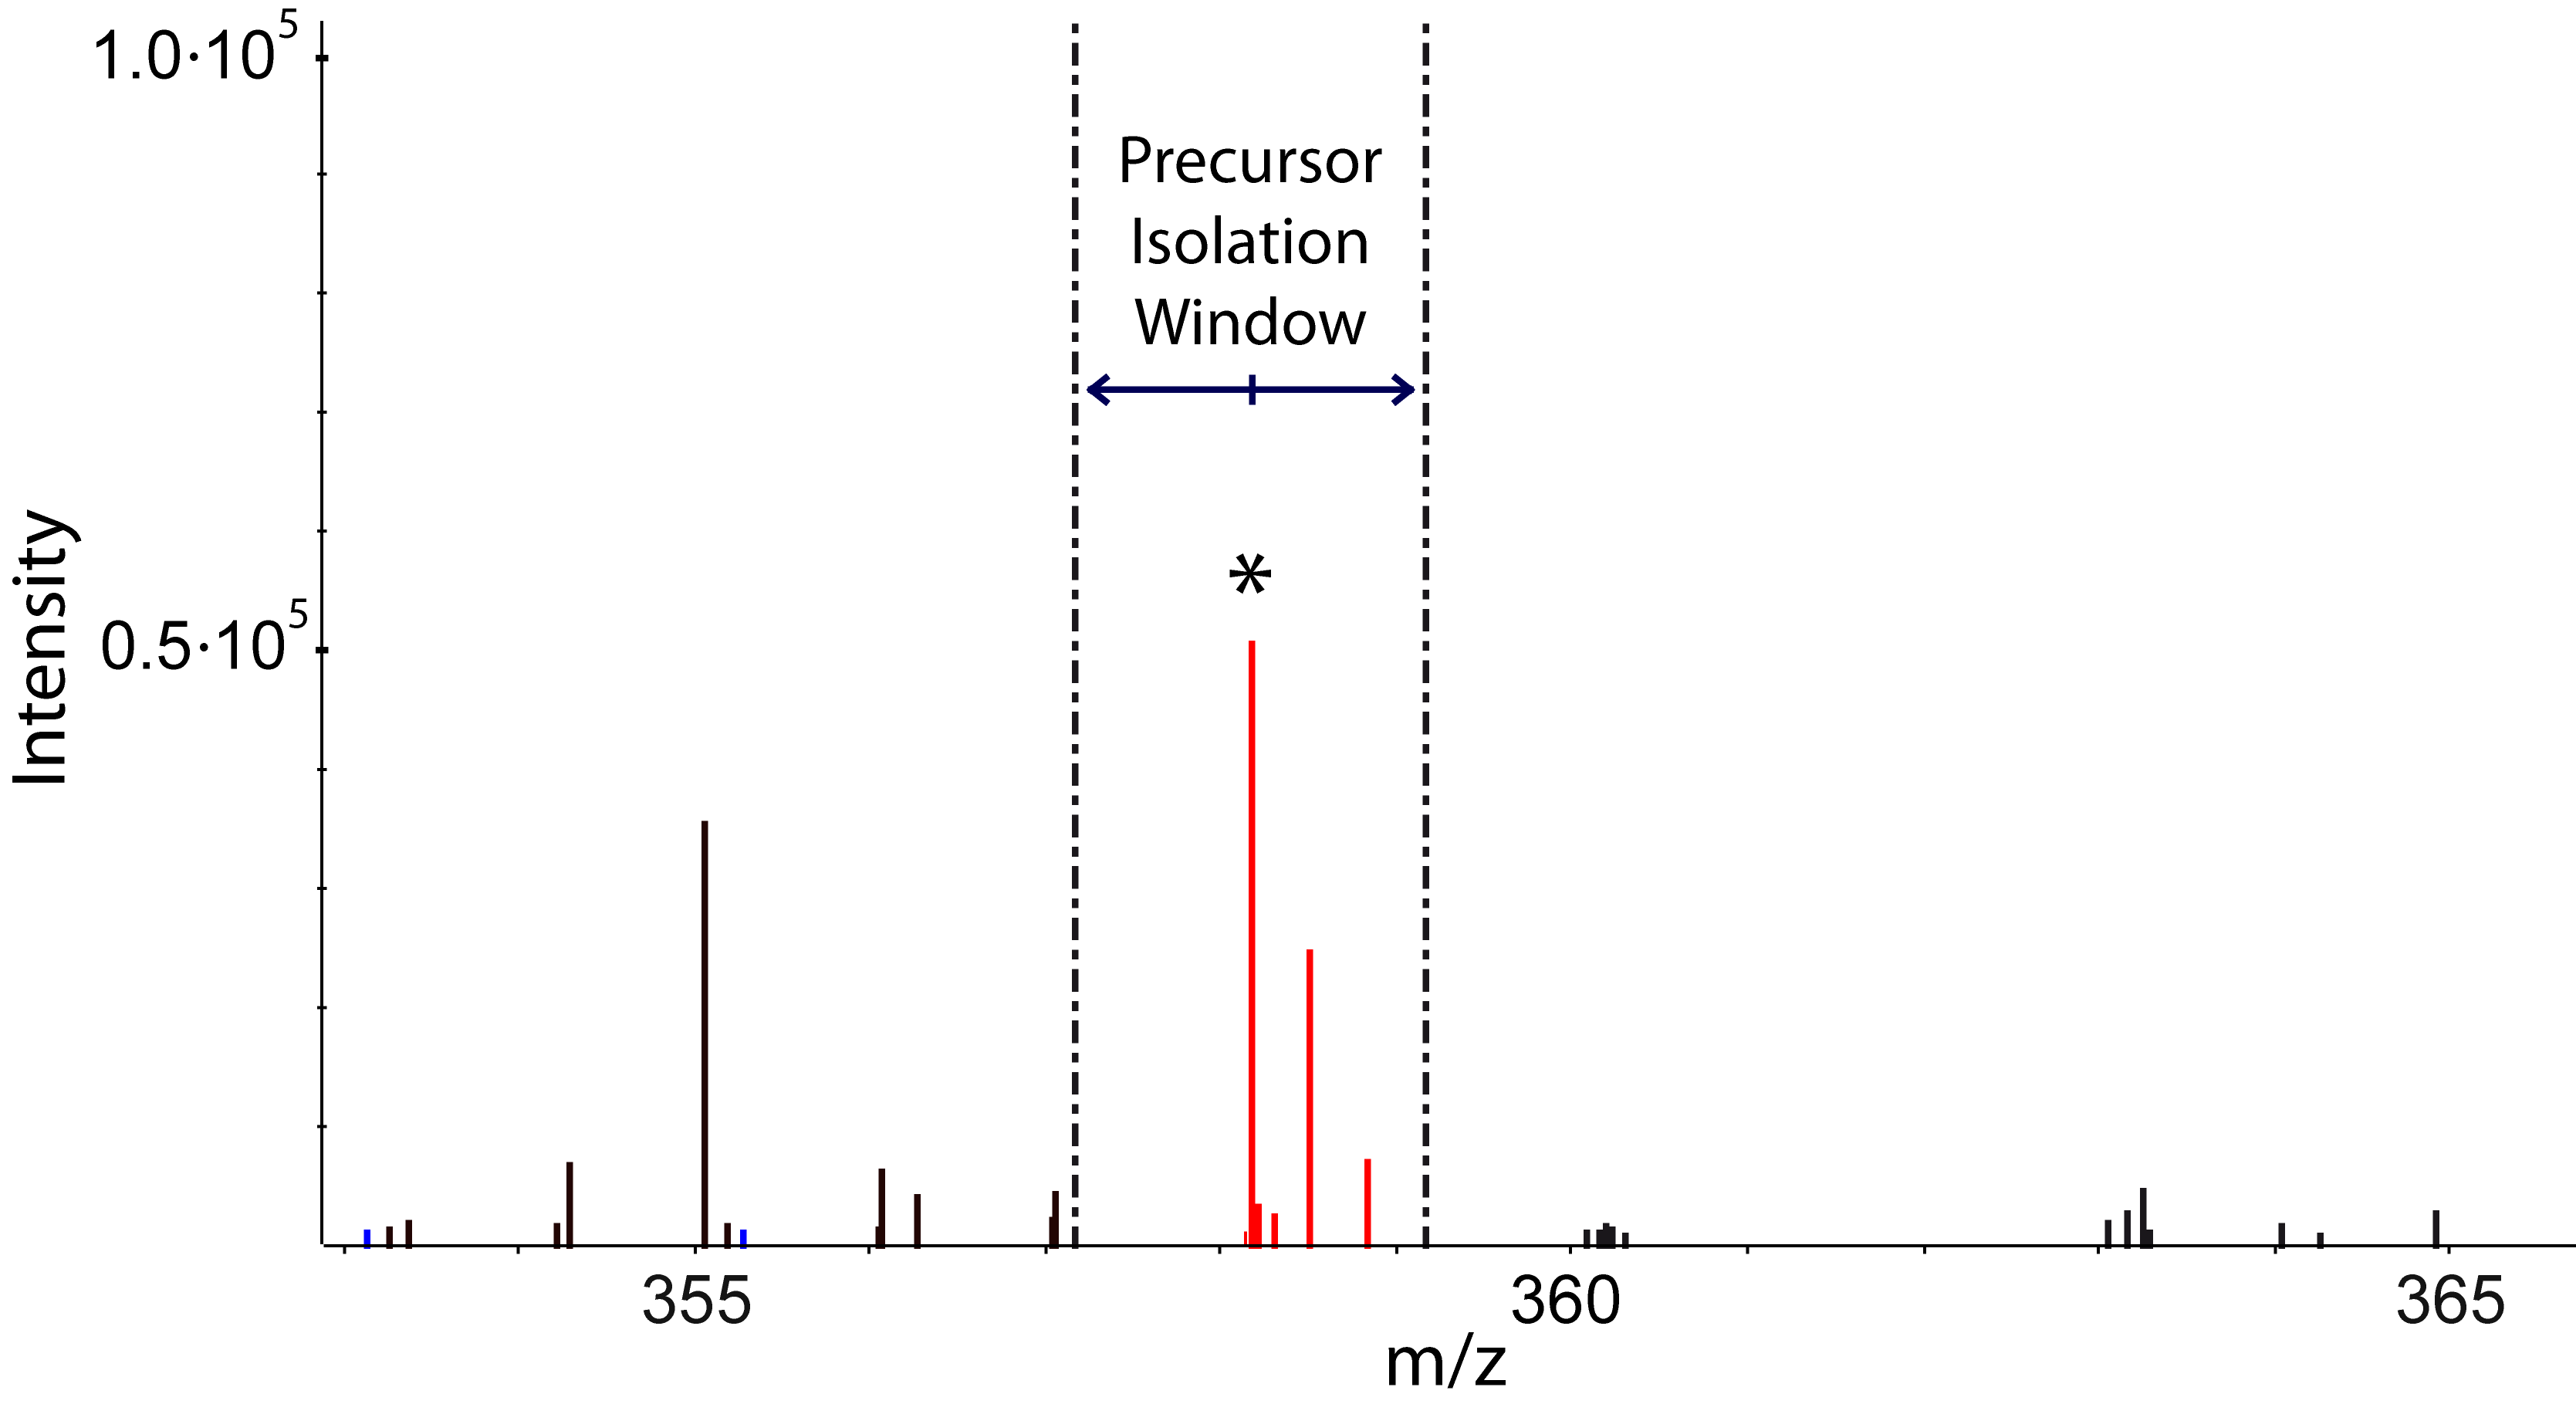

In some cases, the precursor isolation window contains contaminant peaks
from other analytes. Depending on the analysis requirements, this can
lead to issues in quantification for example, for isobaric experiments.

Here, we can assess the purity of the precursor to filter spectra with a
score below our expectation.

In [ ]:
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
    gh + "/src/data/PrecursorPurity_input.mzML", "PrecursorPurity_input.mzML"
)

exp = oms.MSExperiment()
oms.MzMLFile().load("PrecursorPurity_input.mzML", exp)

# for this example, we check which are MS2 spectra and choose one of them
for i, element in enumerate(exp):
    print(str(i) + ": MS" + str(element.getMSLevel()))

# get the precursor information from the MS2 spectrum at index 3
ms2_precursor = exp[3].getPrecursors()[0]

# get the previous recorded MS1 spectrum
isMS1 = False
i = 3  # start at the index of the MS2 spectrum
while isMS1 == False:
    if exp[i].getMSLevel() == 1:
        isMS1 = True
    else:
        i -= 1

ms1_spectrum = exp[i]

# calculate the precursor purity in a 10 ppm precursor isolation window
purity_score = oms.PrecursorPurity().computePrecursorPurity(
    ms1_spectrum, ms2_precursor, 10, True
)

print("\nPurity scores")
print("total:", purity_score.total_intensity)  # 9098343.890625
print("target:", purity_score.target_intensity)  # 7057944.0
print(
    "signal proportion:", purity_score.signal_proportion
)  # 0.7757394186070014
print("target peak count:", purity_score.target_peak_count)  # 1
print("residual peak count:", purity_score.residual_peak_count)  # 4

``` output
0: MS1
1: MS2
2: MS2
3: MS2
4: MS2
5: MS2
6: MS1

Purity scores
total: 9098343.890625
target: 7057944.0
signal proportion: 0.7757394186070014
target peak count: 1
residual peak count: 4
```

We could assess that we have four other non-isotopic peaks apart from
our precursor and its isotope peaks within our precursor isolation
window. The signal of the isotopic peaks correspond to roughly 78% of
all intensities in the precursor isolation window.

## Example: Filtering Mass Spectra

Here we will look at some code snippets that might come in handy when
dealing with mass spectra data.

But first, we will load some test data:

In [ ]:
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/tiny.mzML", "test.mzML")

inp = oms.MSExperiment()
oms.MzMLFile().load("test.mzML", inp)

### Filtering Mass Spectra by :term\`MS\` Level

We will filter the data from `test.mzML` file by only retaining mass
spectra that are not
[MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1)
spectra (e.g.
[MS2](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS2),
[MS3](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS3)
or MSn spectra):

In [ ]:
filtered = oms.MSExperiment()
for s in inp:
    if s.getMSLevel() > 1:
        filtered.addSpectrum(s)

# filtered now only contains spectra with MS level > 2

### Filtering by Scan Number

We could also use a list of scan numbers as filter criterion to only
retain a list of MS scans we are interested in:

In [ ]:
scan_nrs = [0, 2, 5, 7]

filtered = oms.MSExperiment()
for k, s in enumerate(inp):
    if k in scan_nrs:
        filtered.addSpectrum(s)

### Filtering Mass Spectra and Peaks

Suppose we are interested in only in a small m/z window of our fragment
ion mass spectra. We can easily filter our data accordingly:

In [ ]:
mz_start = 6.0
mz_end = 12.0
filtered = oms.MSExperiment()
for s in inp:
    if s.getMSLevel() > 1:
        filtered_mz = []
        filtered_int = []
        for mz, i in zip(*s.get_peaks()):
            if mz > mz_start and mz < mz_end:
                filtered_mz.append(mz)
                filtered_int.append(i)
        s.set_peaks((filtered_mz, filtered_int))
        filtered.addSpectrum(s)

# filtered only contains only fragment spectra with peaks in range [mz_start, mz_end]

Note that in a real-world application, we would set the `mz_start` and
`mz_end` parameter to an actual area of interest, for example the area
between 125 and 132 which contains quantitative ions for a
[TMT](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TMT)
experiment.

Similarly we could only retain peaks above a certain intensity or keep
only the top N peaks in each mass spectrum.

For more advanced filtering tasks pyOpenMS provides special algorithm
classes. We will take a closer look at some of them in the algorithm
section.